## <center> ASPECT EXTRACTION OF FINANCIAL MICROBLOGS </center>

### <center> Done By: </center>
### <center> (Group 16) </center>                                                                                                                                                   <center> Arun Prakash J (CB.EN.U4AIE19014) </center>                                                                                                         <center> Deepthi Sudharsan (CB.EN.U4AIE19022) </center>                                                                                                     <center> Sivamaran M A C (CB.EN.U4AIE19061) </center>                                                                                                              <center> Vuyyuru Bindu Sri (CB.EN.U4AIE19069) </center>


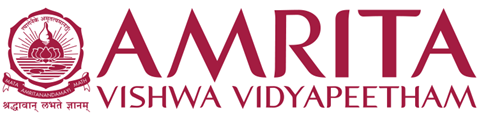


### <center> B.TECH CSE-AI, CEN DEPARTMENT, AMRITA SCHOOL OF ENGINEERING </center>

-------------------------------------------------------------------------------------------------------------------------------
## <center> ACKNOWLEDGEMENT </center>

### This project would not have been possible without the support and guidance of Dr. Sowmya V and Mr. Premjith B, who have provided us with sufficient knowledge and guidelines even during these unprecedented and trying times. 

### We would also like to thank our Computer Science and Engineering (Artificial Intelligence) department for giving us this opportunity to nurture and hone our skills. 

### Furthermore, we would like to thank the Amrita Vishwa Vidyapeetham management for providing ample resources to avail our project needs and a platform for online lectures during this lockdown.


-------------------------------------------------------------------------------------------------------------------------------
## <center><font color='black'> INDEX </font></center>
### <a href='#abstract'> ABSTRACT</a>
### <a href='#intro'> INTRODUCTION</a>
### <a href='#code'> PYTHON COMPUTATION</a>
#### <a href='#read'> a) DATA READING</a>
#### <a href='#preprocessing'> b) DATA PREPROCESSING</a>
#### <a href='#cv'> c) COUNT VECTORIZER</a>
#####  > <a href='#ea1'>  ERRORS AND ACCURACIES OF VARIOUS MODELS (COUNT VECTORIZER)</a>
##### > <a href='#bm1'>  BEST MODEL (COUNT VECTORIZER)</a>
#### <a href='#tv'> d) TFIDF VECTORIZER</a>
#####  > <a href='#ea2'> ERRORS AND ACCURACIES OF VARIOUS MODELS (TFIDF VECTORIZER)</a>
##### >  <a href='#bm2'> BEST MODEL (TFIDF VECTORIZER)</a>
#### <a href='#rw'> e) REMOVING WORDS</a>
### <a href='#ref'> REFERENCES</a>

-------------------------------------------------------------------------------------------------------------------------------
<a id='abstract'></a>

## <center> ABSTRACT </center>

###                                          Aspect Extraction, as the name suggest, deals with the extraction of specific aspects from a given message or text etc. This project deals with the extraction of implicit and explicit financial aspects in microblog messages with the help of stock-investment taxonomy.  

###                                           Given the dataset, the messages first undergo preprocessing after which based on the accuracies of different models, the best model is selected and truncated to get the best feature for the classification process.
 
####  *Keywords:  Aspect, messages, stock, classification, preprocessing, NLP*


-------------------------------------------------------------------------------------------------------------------------------
<a id='intro'></a>
## <center> ASPECT EXTRACTION OF FINANCIAL MICROBLOGS </center>
## <center> **INTRODUCTION** </center>

### Aspect Extraction is one of the most important and fundamental sub-tasks of Sentiment Analysis. Sentiment Analysis is one of the most popular application of Natural Language Processing that finds itself in use in many day-to-day activities. For example, analyzing and predicting what a customer thinks about a product or how a user feels about a software or application based on the feedback given is done using sentiment analysis. The tone of the user/customer is analyzed by extracting necessary aspects (features or attributes) from the feedback. 

### Suppose, a user reviews a book on some platform, say, “The plot of the book is good, but the storyline was a bit predictable”, the feedback has mixed emotions, so the machine is trained such that it understand the sentiment of the feedback given and this gives the suggestion or appreciation to the respective company, here, the author so they can work on it accordingly. 

### In our given scenario, we are looking for specific financial related aspects (“increase”,” plummeting” etc) from the given message dataset so that we can map it to its respective class. One of the main areas where financial aspect extraction from microblogs comes in handy is in Stock Market Prediction. 

-------------------------------------------------------------------------------------------------------------------------------

<a id='code'></a>
## <center> PYTHON COMPUTATION </center>

## Importing all the necessary libraries

In [1]:
#!pip install Unidecode
import pandas as pd
import nltk
import numpy as np
import itertools
from unidecode import unidecode
from nltk.tokenize import sent_tokenize
import string 
import statistics 
from statistics import mode 
#nltk.download('punkt')
import warnings 
warnings.filterwarnings('ignore') # to ignore all suppressible warnings
#pip install git+https://github.com/uclmr/egal.git 
# for installing egal cell to draw flowcharts etc
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

In [2]:
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
# import graphviz package separately 
# https://www.youtube.com/watch?v=WkLhdBbf-3E&feature=youtu.be
# https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/

In [3]:
import time

<a id='read'></a>
## Data Reading 

In [4]:
data = pd.read_json('messages_aspect.json') #reading the json data file
data.head() #.head() prints by default the top 5 rows of the data frame

Messages
0  {'Aspect_Class': 'User Action', 'Aspect_Subcla...
1  {'Aspect_Class': 'User Action', 'Aspect_Subcla...
2  {'Aspect_Class': 'User Action', 'Aspect_Subcla...
3  {'Aspect_Class': 'User Action', 'Aspect_Subcla...
4  {'Aspect_Class': 'User Action', 'Aspect_Subcla...

In [5]:
data['Messages'] #printing the "Messages" column

0      {'Aspect_Class': 'User Action', 'Aspect_Subcla...
1      {'Aspect_Class': 'User Action', 'Aspect_Subcla...
2      {'Aspect_Class': 'User Action', 'Aspect_Subcla...
3      {'Aspect_Class': 'User Action', 'Aspect_Subcla...
4      {'Aspect_Class': 'User Action', 'Aspect_Subcla...
                             ...                        
363    {'Aspect_Class': 'Asset Behavior', 'Aspect_Sub...
364    {'Aspect_Class': 'Asset Behavior', 'Aspect_Sub...
365    {'Aspect_Class': 'Asset Behavior', 'Aspect_Sub...
366    {'Aspect_Class': 'Asset Behavior', 'Aspect_Sub...
367    {'Aspect_Class': 'Asset Behavior', 'Aspect_Sub...
Name: Messages, Length: 368, dtype: object

<a id='preprocessing'></a>
## Data Preprocessing

### Data Preprocessing is a technique that is used to convert the raw data into a clean data set. Whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

### There are many important steps in data preprocessing, such as data cleaning, data transformation, and feature selection etc. Data cleaning and transformation are methods used to remove outliers and standardize the data so that they take a form that can be easily used to create a model. 

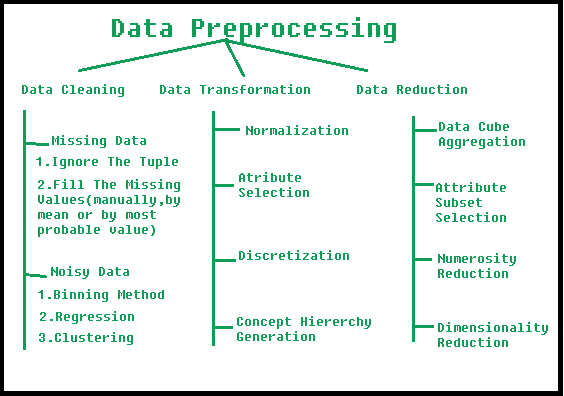

### 1. Converting json data to dataframe

In [6]:
aspect_class = []
aspect_subclass = []
message = []
span = []
sentiment = []
#iteratively appending and creating a proper dataframe for our json data
for i in range(len(data)):
    aspect_class.append(data['Messages'][i]['Aspect_Class'])
    aspect_subclass.append(data['Messages'][i]['Aspect_Subclass'])
    message.append(data['Messages'][i]['Message'])
    span.append(data['Messages'][i]['Span'])
    sentiment.append(data['Messages'][i]['Sentiment'])

In [7]:
df = pd.DataFrame(list(zip(aspect_class, aspect_subclass, message, span, sentiment)), 
                  columns =['aspect_class', 'aspect_subclass','message','span','sentiment']) 

In [8]:
df.head()

aspect_class aspect_subclass                    message  \
0  User Action          Bought                    Back in   
1  User Action          Bought                    Back in   
2  User Action          Bought  In for a quarter position   
3  User Action          Bought           Just added 2,300   
4  User Action          Bought                  in for 3k   

                                                span  sentiment  
0                              $GILD Back in Bullish   0.238123  
1  $LE Back in for a swing on this one @ 15.35/sh...   0.071598  
2           $WLL In for a quarter position @ 8.10...   0.287358  
3  $VNR Just added 2,300 @ .77 Going in for long ...   0.305940  
4                AMD nice bounce - in for 3k @ 13.16   0.267244

In [9]:
df.columns #prints the columns of the dataframe

Index(['aspect_class', 'aspect_subclass', 'message', 'span', 'sentiment'], dtype='object')

In [10]:
set(aspect_class) #set representation of the aspect classes

{'Analyst Ratings',
 'Asset Behavior',
 'Asset Direction',
 'Financial Results',
 'Insider Activity',
 'User Action',
 'User Outlook'}

### 2. Removing punctuation marks and special characters

In [11]:
def remove_punctuations_specialCharacters(listOfSent):
    SentList = listOfSent.copy()
    # making a copy of the span data from the data frame for list of sentences to be preprocessed
    tokensList = [] #empty list to store the tokens
    tokensList = [sent_tokenize(t) for t in SentList] #tokenizes the sentences
    # Tokenization is the process of tokenizing or splitting a string, text into a list of tokens. 
    # One can think of token as parts like a word is a token in a sentence, and a sentence is a token in a paragraph.
    preprocessed_sent=[] #empty list declaration for storing preprocessed sentences
    for i in range(len(tokensList)):
        tokensList[i] = [w.lower() for w in tokensList[i]] # converting the entire sentence to lowercase
        table = str.maketrans('','',string.punctuation) 
        # The maketrans() method returns a mapping table that can be used with the translate()
        #  string.punctuation is a pre-initialized string used as string constant. 
        # In Python, string.punctuation will give the all sets of punctuation.
        # The maketrans() method returns a translation table with a 1-to-1 mapping 
        # of a Unicode ordinal to its translation/replacement.
        # If three arguments are passed, each character in the third argument is mapped to None.
        stripped=[w.translate(table) for w in tokensList[i]]
        # The translate() method returns a string where some specified characters are replaced with the character described 
        # in a dictionary, or in a mapping table.
        unaccented_string =[ unidecode(s) for s in stripped]
        # unidecode accepts a string and converts all non-ascii characters to the closest ascii character available.
        preprocessed_sent.append(unaccented_string)
        #appending the preprocessed sentences to the preprocessed_sent list
        preprocessed_sent[i] = ''.join(preprocessed_sent[i]); 
    return(preprocessed_sent)
    

In [12]:
start = time.time()
PS=remove_punctuations_specialCharacters(span) #calling the function to remove punctuations and special characters
end = time.time()
print(end - start)
#PS

0.025926828384399414


### 3. Label Encoding

### The LabelEncoder is a way to encode class levels.

In [13]:
from sklearn import preprocessing
df1 = df.copy() #creating a copy of the dataframe
le = preprocessing.LabelEncoder() 
#LabelEncoder is used to transform non-numerical labels to numerical labels.
aspect_class_new = le.fit_transform(df1['aspect_class'])
# Fit label encoder

In [14]:
aspect_class_new # printing the encoded labels

array([5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5,
       5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 5, 5,
       5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3,

In [15]:
aspect_features = list(le.classes_) # storing the list of classes in aspect_features
aspect_features

['Analyst Ratings',
 'Asset Behavior',
 'Asset Direction',
 'Financial Results',
 'Insider Activity',
 'User Action',
 'User Outlook']

In [16]:
le.transform(aspect_features) #Transform labels to normalized encoding.

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [17]:
aspect_labels = le.inverse_transform(aspect_class_new) #Transform labels back to original encoding.
aspect_labels

array(['User Action', 'User Action', 'User Action', 'User Action',
       'User Action', 'User Action', 'Asset Direction', 'Asset Direction',
       'Asset Direction', 'Asset Direction', 'Asset Direction',
       'Analyst Ratings', 'Analyst Ratings', 'Analyst Ratings',
       'Analyst Ratings', 'Analyst Ratings', 'Analyst Ratings',
       'User Action', 'User Action', 'User Action', 'User Action',
       'User Action', 'User Action', 'Financial Results',
       'Financial Results', 'Financial Results', 'Financial Results',
       'Financial Results', 'Financial Results', 'Financial Results',
       'Financial Results', 'Financial Results', 'Financial Results',
       'Financial Results', 'Financial Results', 'Insider Activity',
       'Insider Activity', 'Insider Activity', 'Insider Activity',
       'Insider Activity', 'Insider Activity', 'Insider Activity',
       'Insider Activity', 'Insider Activity', 'Insider Activity',
       'Insider Activity', 'Insider Activity', 'Asset Directi

In [18]:
np.shape(aspect_class_new) #printing the shape of the new encoded aspect class

(368,)

<a id='cv'></a>
### 4.CountVectorizer

## <center> **Count vectorizer** </center>

### Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts.

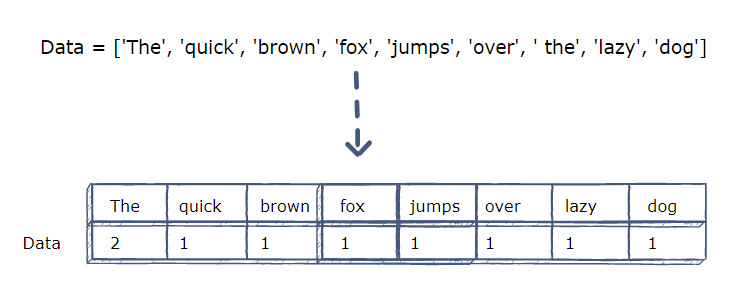

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer()
span_new = vectorizer.fit_transform(PS)

train_data=span_new # the training data is our preprocessed span data
train_target=aspect_class_new.T # our train target is the aspect class
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, test_size=0.2, random_state=42)
# Split arrays or matrices into random train and test subsets
X_train.shape # dimensions of the training data

(294, 1568)

In [20]:
labels_span = vectorizer.get_feature_names() #to get and store feature names in labels_span
span_labels = le.inverse_transform(span_new.toarray()[0]) #Transform labels back to original encoding.

## Decision Tree

### It is a supervised learning model
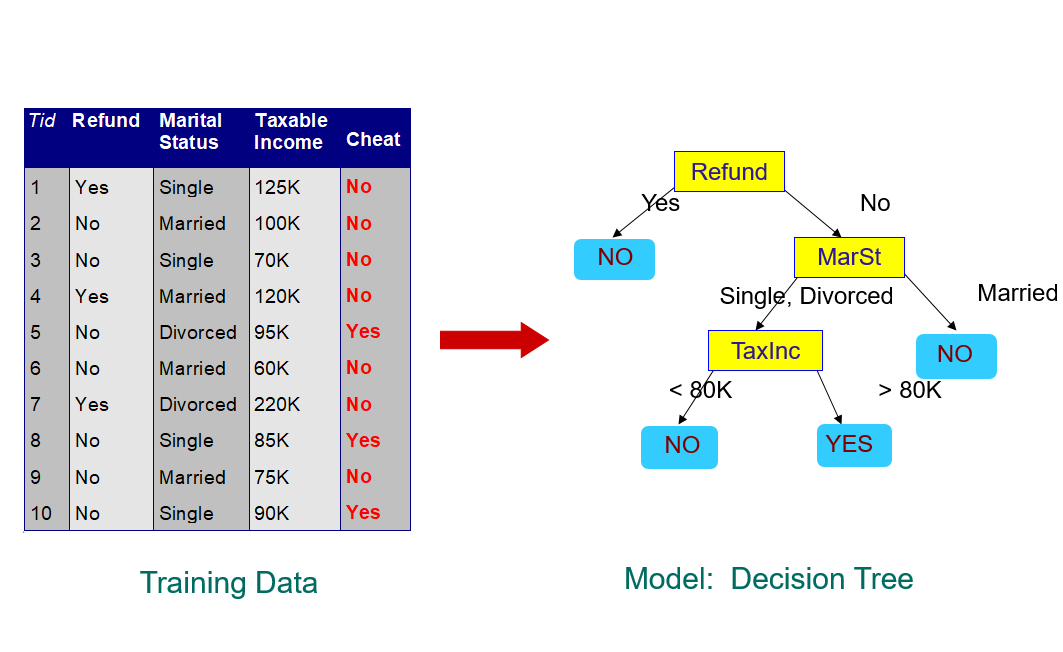

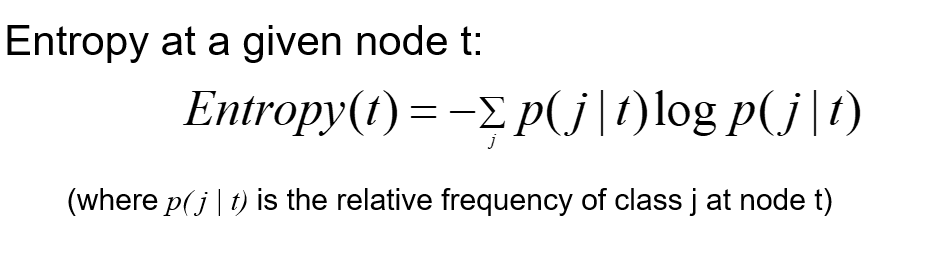

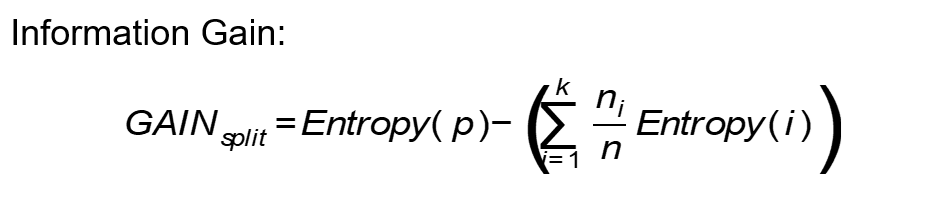

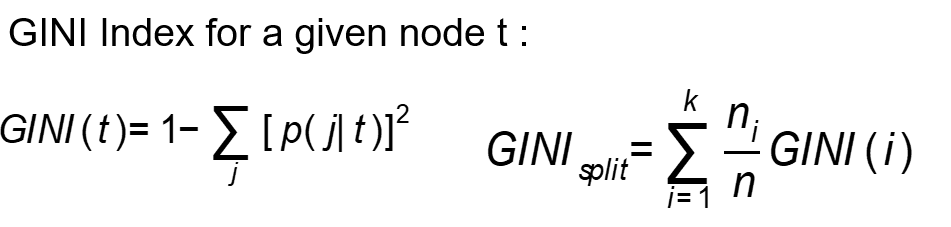

## Random Forest
### Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.
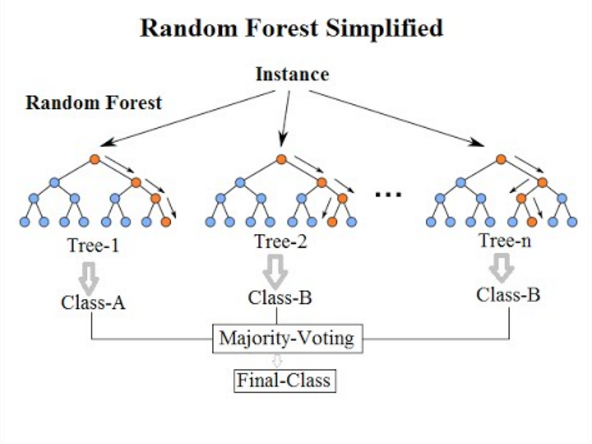


## KNN

<img src="https://machinelearningknowledge.ai/wp-content/uploads/2018/08/KNN-Classification.gif" width="750" align="center">


## Naive Bayes
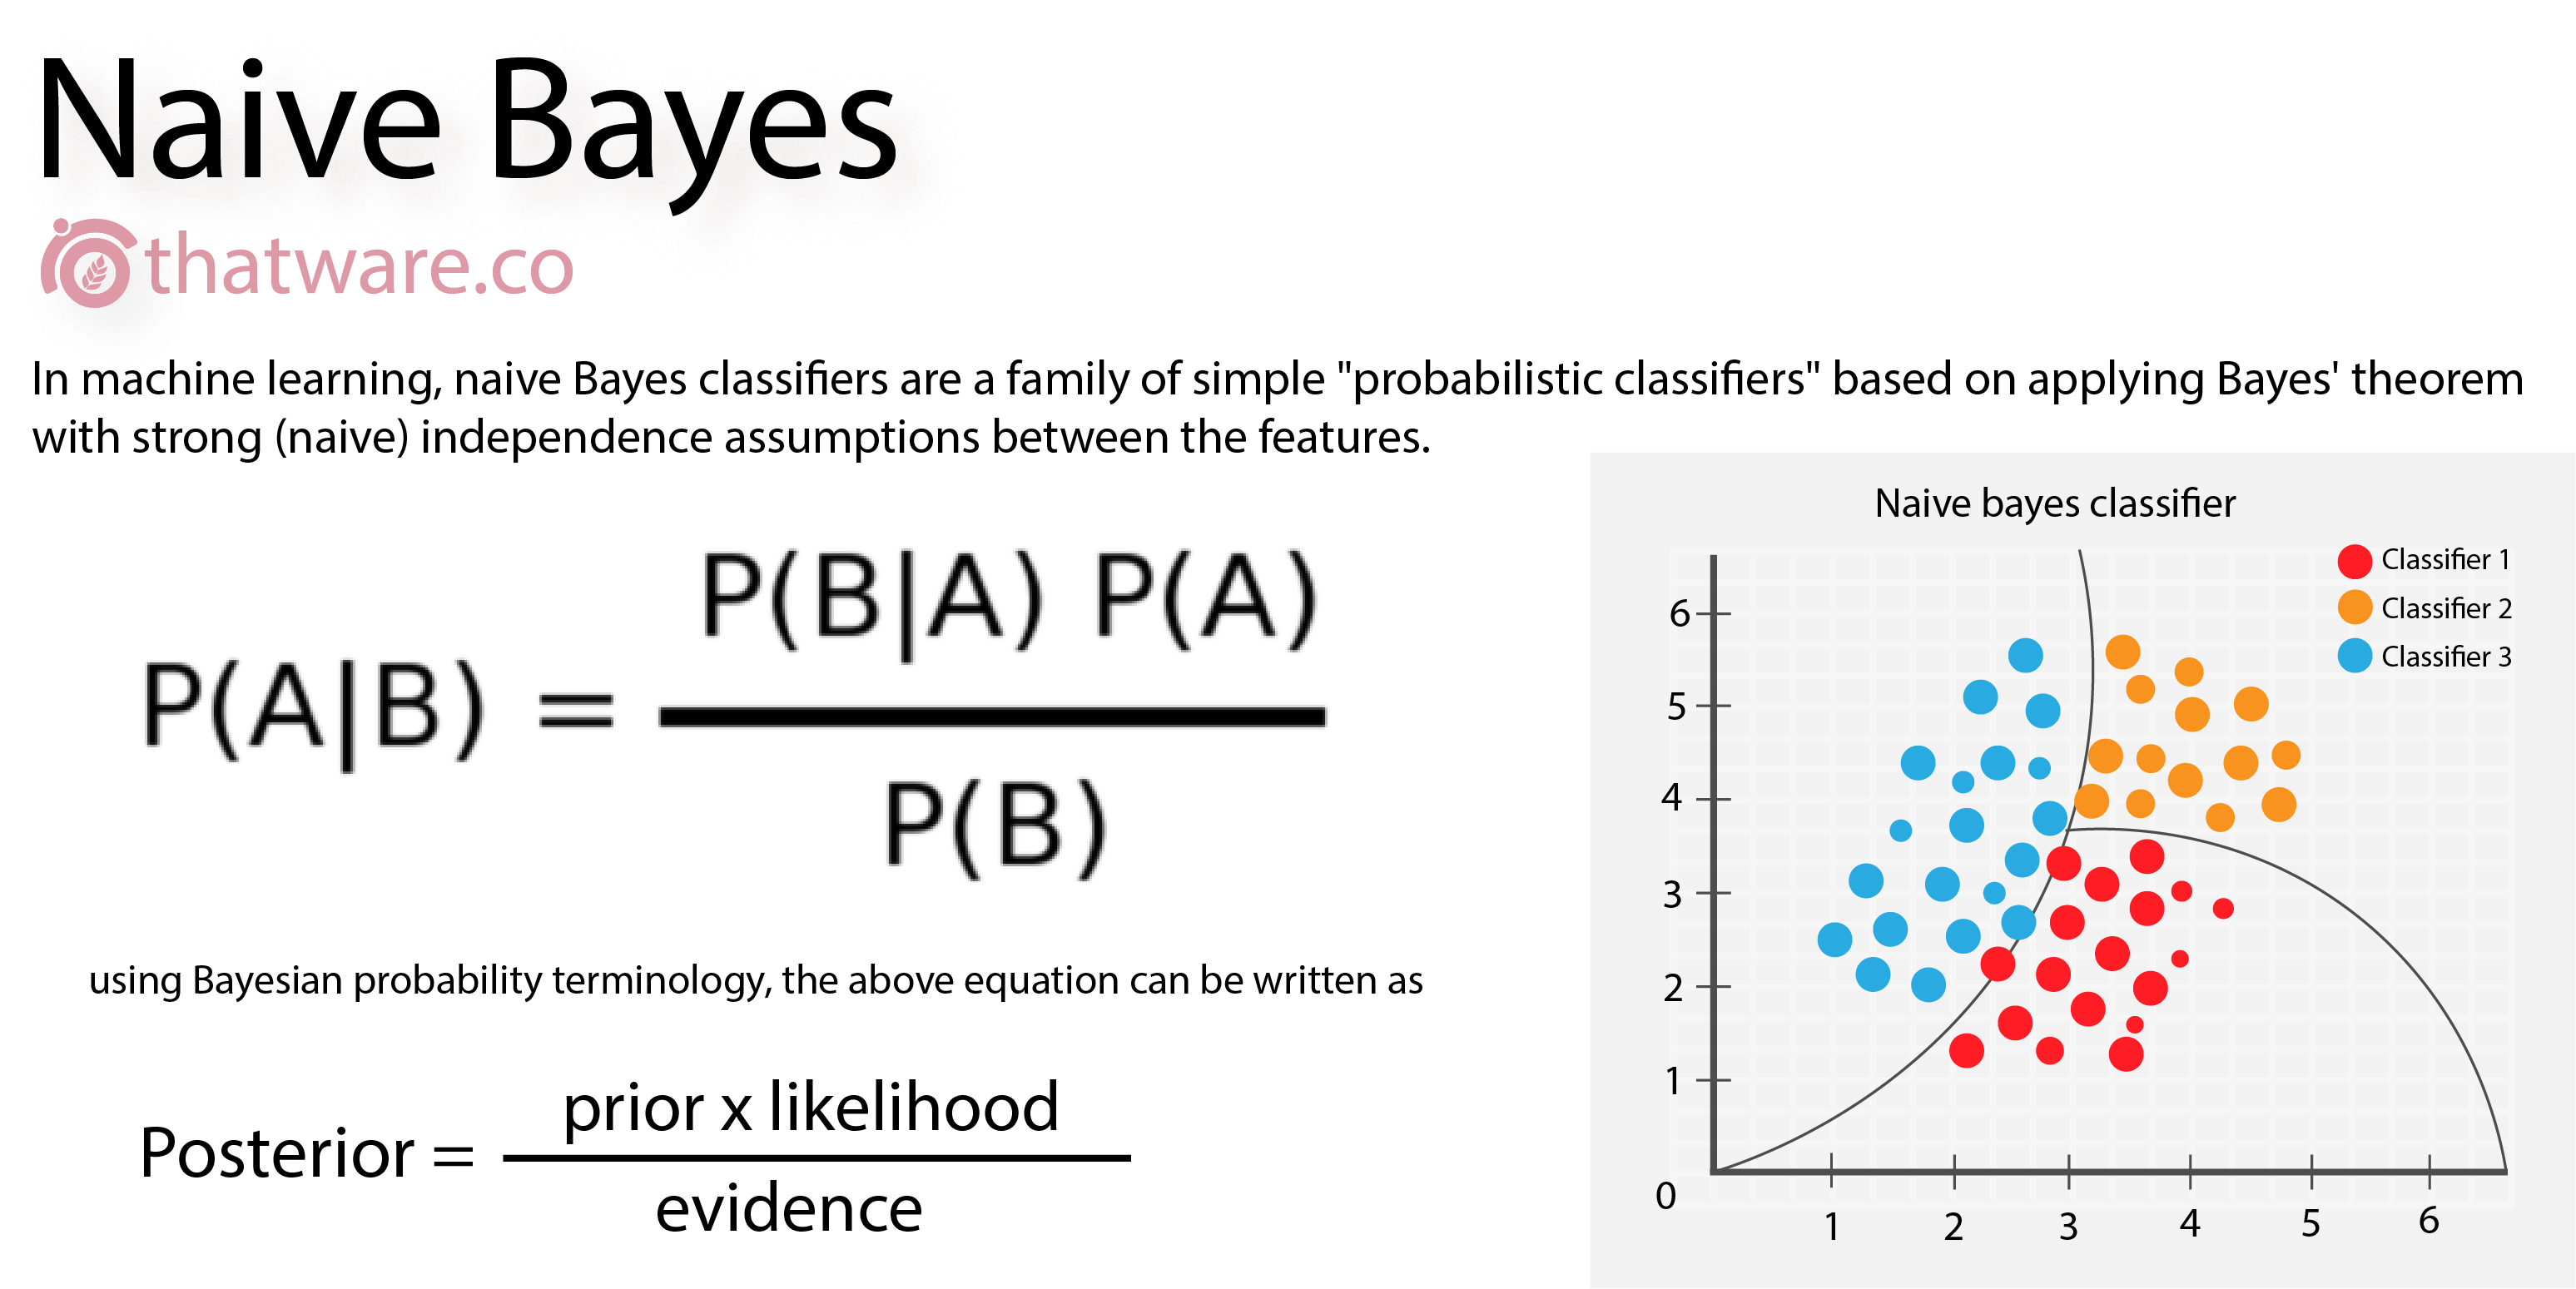

## Support vector Machine
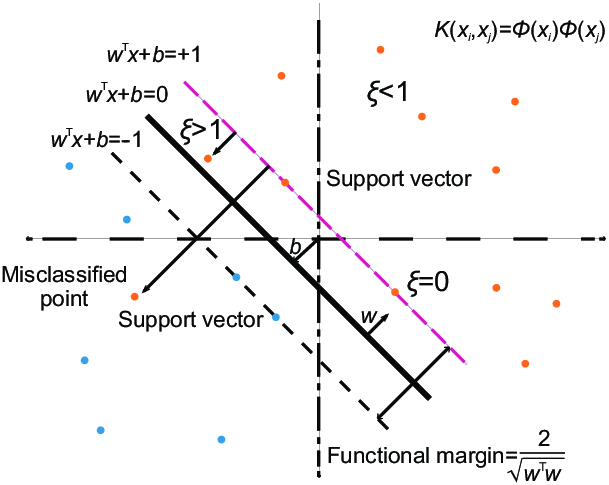

## Hard Margin SVM

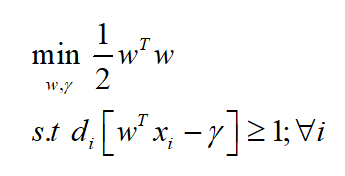

## Soft Margin SVM

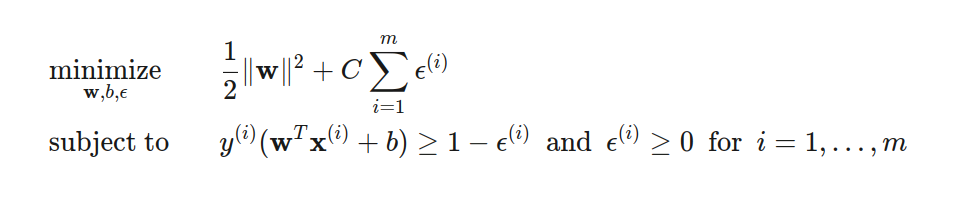

In [21]:
class models_and_metrics:
    
    def __init__(self,X_train, y_train,X_test,y_test):
        # reseved method in python classes (Constructor)
        # training data
        self.X_train=X_train
        self.y_train=y_train
        #testing data
        self.X_test=X_test
        self.y_test=y_test
        #Self.lis is a list of tuples consisting of the model-accuracy pairs
        self.lis=[]
        
    def print_error(self,X_test,y_test, model_name): 
        #function to print the 3 main types of error metrics
        prediction = model_name.predict(X_test)
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction))) 
    
    def print_accuracy(self,X_test,y_test,model_name):
        # function to print and return the accuracy metric in percentage
        prediction = model_name.predict(X_test)
        acc_percent=accuracy_score(y_test, prediction)*100
        print("The accuracy of the model is",acc_percent,"%")
        return acc_percent
        
    # fitting the training data and printing the error and accuracies of various models by calling the respective
    # metric calculation function and appending the model name and accuracy to the self.lis 
    
    def decision_tree_classifier(self):
        decision_tree_classifier=DecisionTreeClassifier()
        decision_tree_classifier.fit(self.X_train, self.y_train)
        self.print_error(self.X_test,self.y_test, decision_tree_classifier)
        a=self.print_accuracy(self.X_test,self.y_test, decision_tree_classifier)
        self.lis.append(["Decision Tree",a])
        #Generate predictions with the model using our X values
        y_pred = decision_tree_classifier.predict(self.X_train)
        #Get the confusion matrix
        cf_matrix = confusion_matrix(self.y_train, y_pred)
        # heatmap of the confusion matrix
        ax = sns.heatmap(cf_matrix, annot=True)
        # since matplotlib has a bug that cuts off half of the top and botton rows, we are adjusting 
        # the y axis for plotting 
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
        # Exports a decision tree in DOT format. 
        dot_data = export_graphviz(decision_tree_classifier, out_file=None,filled=True, rounded=True)
        # Graphviz's dot language Python interface. This module provides with a full interface to 
        # create handle modify and process graphs in Graphviz's dot language 
        graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
        # to write the DOT graph in png file
        graph.write_png("dtree.png")
   
    def Grid_decision_tree_classifier(self):
        params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
        grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
        grid_search_cv.fit(self.X_train, self.y_train)
        self.print_error(self.X_test,self.y_test, grid_search_cv)
        a=self.print_accuracy(self.X_test,self.y_test,grid_search_cv)
        self.lis.append(["Grid Decision Tree",a])
        #Generate predictions with the model using our X values
        y_pred = grid_search_cv.predict(self.X_train)
        #Get the confusion matrix
        cf_matrix = confusion_matrix(self.y_train, y_pred)
        # heatmap of the confusion matrix
        ax = sns.heatmap(cf_matrix, annot=True)
        # since matplotlib has a bug that cuts off half of the top and botton rows, we are adjusting 
        # the y axis for plotting 
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
        # Exports a decision tree in DOT format. 
        dot_data = export_graphviz(grid_search_cv.best_estimator_, out_file=None,filled=True, rounded=True)
        # Graphviz's dot language Python interface. This module provides with a full interface to 
        # create handle modify and process graphs in Graphviz's dot language 
        graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
        graph.write_png("griddtree.png")
        # to write the DOT graph in png file
        
    def random_forest(self):
        rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 
        param_grid = { 'n_estimators': [200, 700], 'max_features': ['auto', 'sqrt', 'log2']}
        CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
        CV_rfc.fit(self.X_train, self.y_train)
        self.print_error(self.X_test,self.y_test,CV_rfc)
        a=self.print_accuracy(self.X_test,self.y_test,CV_rfc)
        self.lis.append(["Random Forest",a])
        #Generate predictions with the model using our X values
        y_pred = CV_rfc.predict(self.X_train)
        #Get the confusion matrix
        cf_matrix = confusion_matrix(self.y_train, y_pred)
        # heatmap of the confusion matrix
        ax = sns.heatmap(cf_matrix, annot=True)
        # since matplotlib has a bug that cuts off half of the top and botton rows, we are adjusting 
        # the y axis for plotting 
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
    
    def knn(self):
        k_range = list(range(1,31))
        weight_options = ["uniform", "distance"]
        param_grid = dict(n_neighbors = k_range, weights = weight_options)
        knn = KNeighborsClassifier()
        grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
        grid.fit(self.X_train, self.y_train)
        self.print_error(self.X_test,self.y_test, grid)
        a=self.print_accuracy(self.X_test,self.y_test,grid)
        self.lis.append(["Knn",a])
        #Generate predictions with the model using our X values
        y_pred = grid.predict(self.X_train)
        #Get the confusion matrix
        cf_matrix = confusion_matrix(self.y_train, y_pred)
        # heatmap of the confusion matrix
        ax = sns.heatmap(cf_matrix, annot=True)
        # since matplotlib has a bug that cuts off half of the top and botton rows, we are adjusting 
        # the y axis for plotting 
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
        
    def naives_bayes(self):
        params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
        bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
        bernoulli_nb_grid.fit(self.X_train,self.y_train)
        self.print_error(self.X_test,self.y_test, bernoulli_nb_grid)
        a=self.print_accuracy(self.X_test,self.y_test,bernoulli_nb_grid)
        self.lis.append(["Naive Bayes",a])
        #Generate predictions with the model using our X values
        y_pred = bernoulli_nb_grid.predict(self.X_train)
        #Get the confusion matrix
        cf_matrix = confusion_matrix(self.y_train, y_pred)
        # heatmap of the confusion matrix
        ax = sns.heatmap(cf_matrix, annot=True)
        # since matplotlib has a bug that cuts off half of the top and botton rows, we are adjusting 
        # the y axis for plotting 
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
                
    def Support_vector_classifier(self):
        svm = SVC()
        parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
        clf = GridSearchCV(svm, parameters)
        clf.fit(self.X_train, self.y_train)
        self.print_error(self.X_test,self.y_test, clf)
        a=self.print_accuracy(self.X_test,self.y_test,clf)
        self.lis.append(["SVM",a])
        #Generate predictions with the model using our X values
        y_pred = clf.predict(self.X_train)
        #Get the confusion matrix
        cf_matrix = confusion_matrix(self.y_train, y_pred)
        # heatmap of the confusion matrix
        ax = sns.heatmap(cf_matrix, annot=True)
        # since matplotlib has a bug that cuts off half of the top and botton rows, we are adjusting 
        # the y axis for plotting 
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
    
    def select_features(self):
        # thsi function is used to select the best features 
        fs = SelectKBest(score_func=chi2, k=1)
        # SelectKBest selects the top K best features, since we want only 1 top best feature
        # k is given as 1 in the calling function
        fit = fs.fit(self.X_train,self.y_train)
        # fits the training data
        dfscores = fit.scores_ #stores the feature scores
        X_train_fs = fs.transform(self.X_train) # Reduces X_train data to the selected features.
        X_test_fs = fs.transform(self.X_test) # Reduces X_test data to the selected features.
        return X_train_fs, X_test_fs, dfscores
    
    def best_model(self):
        #function to find the best model based on the accuracies of the models trained
        print(self.lis)
        Dict = {item[0]: item[1:][0] for item in self.lis}
        keys = list(Dict.keys()) # creating a list of Dict keys
        vals = list(Dict.values()) # creating a list of Dict values
        print("The best model is ",keys[vals.index(max(vals))]) # getting the model with the highest accuracy
        print("Accuracy of ",keys[vals.index(max(vals))],'is',max(vals)) #getting the accuracy of the best model
    

In [22]:
p1 = models_and_metrics(X_train, y_train,X_test,y_test) 
# creating object p1 of the models_And_metrics class by calling the parameterized constructor 

In [23]:
a,b,c=p1.select_features()
c_new= np.nan_to_num(c) 
# Replace NaN with zero and infinity with large finite numbers (default behaviour) 
labels_span = vectorizer.get_feature_names() #to get the feature names
ind_words = np.argsort(c_new)[-int(c_new.shape[0]/2):]   # argsort Returns the indices that would sort an array.
# that is the indices of the best/important words in c_new
best_words_span = []
for i in ind_words:
    best_words_span.append(labels_span[i]) #storing the best or most important words or terms
abcd = np.nonzero(a) 
#print(best_words_span)
xyz = abcd[0].tolist()
features = []
for i in xyz:
    features.append(df.iloc[i,0])
print(mode(features)) # the most reccurring feature with which classification is efficient is printed

Analyst Ratings


In [24]:
word_score = sorted(c_new)[-20:] #sorting the word score of the top 20 words 
span_plot = best_words_span[-20:] #getting the top 20 best/important span words
df_1 = pd.DataFrame(list(zip(span_plot, word_score)),columns = ['span_plot' , 'word_score']) 

In [25]:
#Plotly Tools
# pip install plotly
# pip install cufflinks
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
import plotly.tools as tls
init_notebook_mode(connected=True)


In [26]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [27]:
df_1.groupby('span_plot').sum()['word_score'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='word_score',xTitle = 'span_words', linecolor='black', title='Top 20 words in span')


<a id='ea1'></a>
### Errors and accuracies of various models

Mean Absolute Error: 1.0675675675675675
Mean Squared Error: 3.77027027027027
Root Mean Squared Error: 1.9417183807829266
The accuracy of the model is 64.86486486486487 %
Time taken to perform SVC in seconds -  3.96539044380188


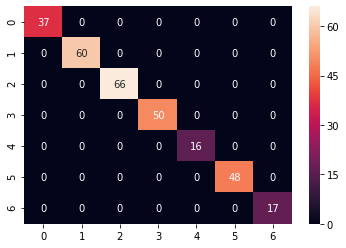

In [28]:
svc_start = time.time()
p1.Support_vector_classifier()
svc_end = time.time()
svc_count_vectorizer = svc_end - svc_start
print("Time taken to perform SVC in seconds - ",svc_count_vectorizer)

Mean Absolute Error: 0.8108108108108109
Mean Squared Error: 2.5675675675675675
Root Mean Squared Error: 1.602363119760177
The accuracy of the model is 70.27027027027027 %
Time taken to perform random forest in seconds -  18.369710683822632


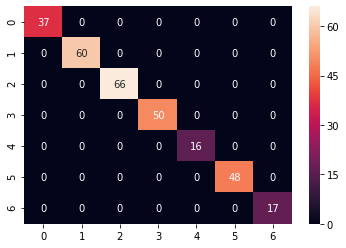

In [29]:
rf_start = time.time()
p1.random_forest()
rf_end = time.time()
rf_count_vectorizer =  rf_end - rf_start
print("Time taken to perform random forest in seconds - ",rf_count_vectorizer)

Mean Absolute Error: 1.027027027027027
Mean Squared Error: 3.5945945945945947
Root Mean Squared Error: 1.8959416115995225
The accuracy of the model is 63.51351351351351 %
Time taken to perform decision_tree_classifier in seconds -  3.5352373123168945


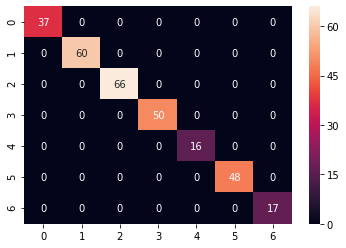

In [30]:
dtc_start = time.time()
p1.decision_tree_classifier()
dtc_end = time.time()
dtc_count_vectorizer = dtc_end - dtc_start
print("Time taken to perform decision_tree_classifier in seconds - ", dtc_count_vectorizer)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    8.8s finished


Mean Absolute Error: 0.9054054054054054
Mean Squared Error: 3.2837837837837838
Root Mean Squared Error: 1.8121213490778656
The accuracy of the model is 70.27027027027027 %
Time taken to perform Grid_decision_tree_classifier in seconds -  10.47052526473999


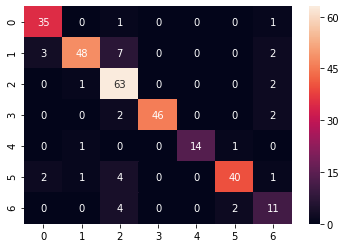

In [31]:
gdtc_start = time.time()
p1.Grid_decision_tree_classifier()
gdtc_end = time.time()
gdtc_count_vectorizer =  gdtc_end - gdtc_start
print("Time taken to perform Grid_decision_tree_classifier in seconds - ",gdtc_count_vectorizer)

Mean Absolute Error: 1.3783783783783783
Mean Squared Error: 4.72972972972973
Root Mean Squared Error: 2.1747941810042
The accuracy of the model is 50.0 %
Time taken to perform knn in seconds -  1.2965290546417236


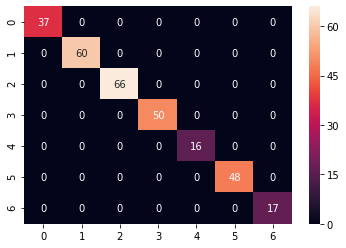

In [32]:
knn_start = time.time()
p1.knn()
knn_end = time.time()
knn_count_vectorizer = knn_end - knn_start
print("Time taken to perform knn in seconds - ", knn_count_vectorizer)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mean Absolute Error: 1.2702702702702702
Mean Squared Error: 4.5675675675675675
Root Mean Squared Error: 2.137186834969645
The accuracy of the model is 58.108108108108105 %
Time taken to perform nb in seconds -  0.14364886283874512


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


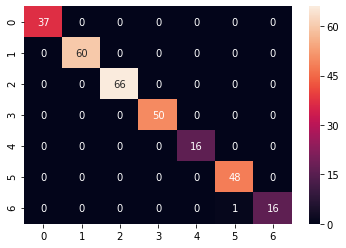

In [33]:
nb_start = time.time()
p1.naives_bayes()
nb_end = time.time()
nb_count_vectorizer = nb_end - nb_start
print("Time taken to perform nb in seconds - ", nb_count_vectorizer)

<a id='bm1'></a>
### Best Model (Using CountVectorizer)

In [34]:
p1.best_model()

[['SVM', 64.86486486486487], ['Random Forest', 70.27027027027027], ['Decision Tree', 63.51351351351351], ['Grid Decision Tree', 70.27027027027027], ['Knn', 50.0], ['Naive Bayes', 58.108108108108105]]
The best model is  Random Forest
Accuracy of  Random Forest is 70.27027027027027


In [35]:
modellist = pd.DataFrame(p1.lis,columns = ['Models' , 'Accuracy'])
modellist

Models   Accuracy
0                 SVM  64.864865
1       Random Forest  70.270270
2       Decision Tree  63.513514
3  Grid Decision Tree  70.270270
4                 Knn  50.000000
5         Naive Bayes  58.108108

In [36]:
modellist.groupby('Models').sum()['Accuracy'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='ACCURACY',xTitle ='MODELS', linecolor='black', title='ACCURACIES OF VARIOUS TRAINED MODELS')

<a id='tv'></a>
### 5. TfidfVectorizer
 
## <center> **TF-IDF** </center>
### TermFrequency (tf) : gives us the frequency of the word in each document in the corpus.

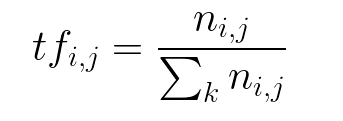

### InverseDocumentFrequency (idf) : used to calculate the weight of rare words across all documents in the corpus.

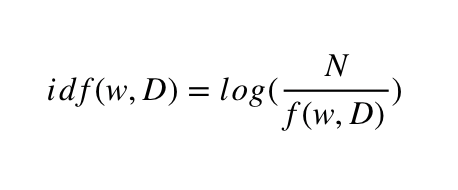

### Tf-Idf :

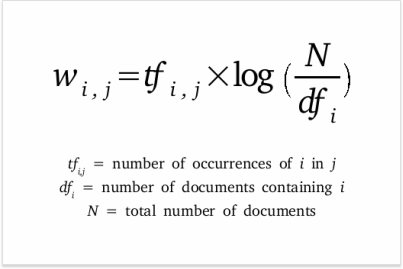

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
span_new = vectorizer.fit_transform(PS)

In [38]:
train_data=span_new
train_target=aspect_class_new.T
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, test_size=0.2, random_state=42)
X_train.shape

(294, 1568)

In [39]:
p2 = models_and_metrics(X_train, y_train,X_test,y_test)

<a id='ea2'></a>
### Errors and accuracies of various models

Mean Absolute Error: 0.9324324324324325
Mean Squared Error: 3.2027027027027026
Root Mean Squared Error: 1.7896096509302533
The accuracy of the model is 67.56756756756756 %
Time taken to perform SVC in seconds -  4.014258623123169


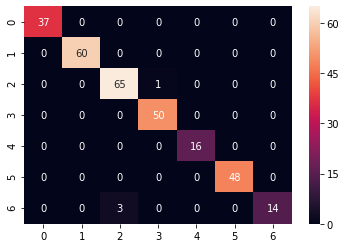

In [40]:
svc2_start = time.time()
p2.Support_vector_classifier()
svc2_end = time.time()
svc_tfidf_vectorizer =  svc2_end - svc2_start
print("Time taken to perform SVC in seconds - ",svc_tfidf_vectorizer)

Mean Absolute Error: 0.7837837837837838
Mean Squared Error: 2.3783783783783785
Root Mean Squared Error: 1.5421992019121196
The accuracy of the model is 68.91891891891892 %
Time taken to perform random forest in seconds -  16.575044870376587


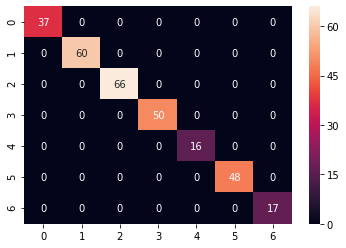

In [41]:
rf2_start = time.time()
p2.random_forest()
rf2_end = time.time()
rf_tfidf_vectorizer = rf2_end - rf2_start
print("Time taken to perform random forest in seconds - ",rf_tfidf_vectorizer )

Mean Absolute Error: 0.8243243243243243
Mean Squared Error: 2.77027027027027
Root Mean Squared Error: 1.6644128905623958
The accuracy of the model is 70.27027027027027 %
Time taken to perform decision_tree_classifier in seconds -  3.910783529281616


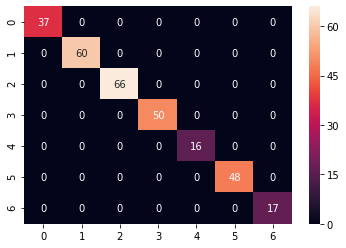

In [42]:
dtc2_start = time.time()
p2.decision_tree_classifier()
dtc2_end = time.time()
dtc_tfidf_vectorizer = dtc2_end - dtc2_start
print("Time taken to perform decision_tree_classifier in seconds - ", dtc_tfidf_vectorizer)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   10.1s finished


Mean Absolute Error: 0.8648648648648649
Mean Squared Error: 2.810810810810811
Root Mean Squared Error: 1.6765472885698187
The accuracy of the model is 66.21621621621621 %
Time taken to perform Grid_decision_tree_classifier in seconds -  12.382526397705078


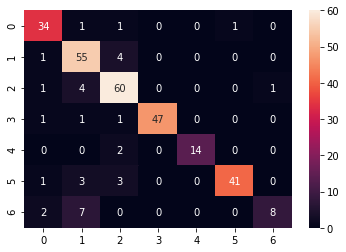

In [43]:
gdtc2_start = time.time()
p2.Grid_decision_tree_classifier()
gdtc2_end = time.time()
gdtc_tfidf_vectorizer = gdtc2_end - gdtc2_start
print("Time taken to perform Grid_decision_tree_classifier in seconds - ",gdtc_tfidf_vectorizer )

Mean Absolute Error: 0.8243243243243243
Mean Squared Error: 2.77027027027027
Root Mean Squared Error: 1.6644128905623958
The accuracy of the model is 68.91891891891892 %
Time taken to perform knn in seconds -  1.075162410736084


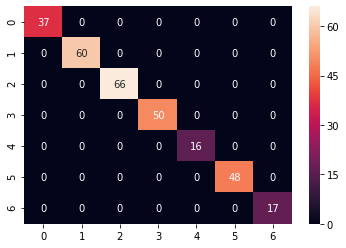

In [44]:
knn2_start = time.time()
p2.knn()
knn2_end = time.time()
knn_tfidf_vectorizer =  knn2_end - knn2_start
print("Time taken to perform knn in seconds - ",knn_tfidf_vectorizer)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mean Absolute Error: 1.2702702702702702
Mean Squared Error: 4.5675675675675675
Root Mean Squared Error: 2.137186834969645
The accuracy of the model is 58.108108108108105 %
Time taken to perform nb in seconds -  0.1251211166381836


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of  25 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


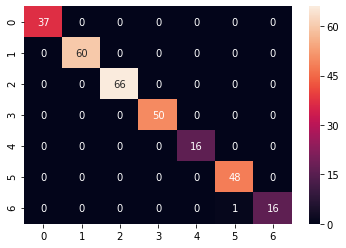

In [45]:
nb2_start = time.time()
p2.naives_bayes()
nb2_end = time.time()
nb_tfidf_vectorizer =  nb2_end - nb2_start
print("Time taken to perform nb in seconds - ",nb_tfidf_vectorizer)

<a id='bm2'></a>
### Best Model (Using TfidfVectorizer)

In [46]:
p2.best_model()

[['SVM', 67.56756756756756], ['Random Forest', 68.91891891891892], ['Decision Tree', 70.27027027027027], ['Grid Decision Tree', 66.21621621621621], ['Knn', 68.91891891891892], ['Naive Bayes', 58.108108108108105]]
The best model is  Decision Tree
Accuracy of  Decision Tree is 70.27027027027027


In [47]:
modellist2 = pd.DataFrame(p2.lis,columns = ['Models' , 'Accuracy'])
modellist2

Models   Accuracy
0                 SVM  67.567568
1       Random Forest  68.918919
2       Decision Tree  70.270270
3  Grid Decision Tree  66.216216
4                 Knn  68.918919
5         Naive Bayes  58.108108

In [48]:
modellist2.groupby('Models').sum()['Accuracy'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='ACCURACY',xTitle ='MODELS', linecolor='black', title='ACCURACIES OF VARIOUS TRAINED MODELS')


<a id='rw'></a>
## Removing words

In [49]:
old_vocab=PS # our old preproccessed span data
print(old_vocab)

['gild back in bullish', 'le back in for a swing on this one  1535shlast time was 50 within 3 months', 'wll in for a quarter position  810', 'vnr just added 2300  77 going in for long term as this will hit 120 next month', 'amd nice bounce  in for 3k  1316', 'bought back into tsla previously sold at 362', 'tsla that is one pretty chart and breakout', 'tsla looking like another breakout today based on qqq and premarket', 'plug weekly viewready for breakout', 'breakoutstock  amzn 950 price target', 'watt breaking out bullish', 'macquarie reiterates "buy" rating for httpamazoncom  inc amzn', 'cantor fitzgerald sticks to its buy rating for amazon amzn', 'analyst activity - barclays plc reiterates buy on agilent technologies nysea httpstcosjsmp8qzxs a', 'amc 87 of analysts have a buy rating on amc with 20 upside', '5star analyst robin m farley from ubs reiterated a buy on mgm', 'check point software technologies ltd chkp receives outperform rating from oppenheimer holdings inc', 'tradeidea 

In [50]:
new_PS=[]
new_word=[]
new_vocab=[]
# new data removing the least important words 
for word in PS:
    new_word=[]   
    for i in word.split():   
        if i in best_words_span:
            new_word.append(i) #appending the best words from the span data to new_word
    new_vocab.append(new_word) #appending to the new vocab list
    
for i in new_vocab:
    new_PS.append(' '.join(i))

while("" in new_PS):                          # to remove empty element lists 
    new_PS.remove("")        

In [51]:
print(new_vocab) # new vocab after removing the least important words

[['gild', 'back', 'in', 'bullish'], ['le', 'back', 'in', 'for', 'swing', 'this', 'one', '1535shlast', 'time', '50', 'within', 'months'], ['wll', 'in', 'for', 'quarter', 'position', '810'], ['just', 'added', 'going', 'in', 'for', 'long', 'term', 'as', 'this', 'will', 'hit', 'next'], ['in', 'for', '3k', '1316'], ['bought', 'back', 'tsla', 'sold', 'at'], ['tsla', 'that', 'is', 'one', 'chart', 'and', 'breakout'], ['tsla', 'like', 'breakout', 'qqq', 'and', 'premarket'], ['for', 'breakout'], ['amzn', 'price', 'target'], ['out', 'bullish'], ['macquarie', 'reiterates', 'rating', 'for', 'httpamazoncom', 'inc', 'amzn'], ['cantor', 'fitzgerald', 'sticks', 'to', 'its', 'buy', 'rating', 'for', 'amzn'], ['analyst', 'activity', 'barclays', 'plc', 'reiterates', 'buy', 'agilent', 'technologies', 'nysea', 'httpstcosjsmp8qzxs'], ['amc', '87', 'of', 'analysts', 'have', 'buy', 'rating', 'amc', 'with'], ['analyst', 'from', 'reiterated', 'buy'], ['check', 'point', 'software', 'technologies', 'ltd', 'chkp', '

In [52]:
PS

['gild back in bullish',
 'le back in for a swing on this one  1535shlast time was 50 within 3 months',
 'wll in for a quarter position  810',
 'vnr just added 2300  77 going in for long term as this will hit 120 next month',
 'amd nice bounce  in for 3k  1316',
 'bought back into tsla previously sold at 362',
 'tsla that is one pretty chart and breakout',
 'tsla looking like another breakout today based on qqq and premarket',
 'plug weekly viewready for breakout',
 'breakoutstock  amzn 950 price target',
 'watt breaking out bullish',
 'macquarie reiterates "buy" rating for httpamazoncom  inc amzn',
 'cantor fitzgerald sticks to its buy rating for amazon amzn',
 'analyst activity - barclays plc reiterates buy on agilent technologies nysea httpstcosjsmp8qzxs a',
 'amc 87 of analysts have a buy rating on amc with 20 upside',
 '5star analyst robin m farley from ubs reiterated a buy on mgm',
 'check point software technologies ltd chkp receives outperform rating from oppenheimer holdings i

In [53]:
new_PS

['gild back in bullish',
 'le back in for swing this one 1535shlast time 50 within months',
 'wll in for quarter position 810',
 'just added going in for long term as this will hit next',
 'in for 3k 1316',
 'bought back tsla sold at',
 'tsla that is one chart and breakout',
 'tsla like breakout qqq and premarket',
 'for breakout',
 'amzn price target',
 'out bullish',
 'macquarie reiterates rating for httpamazoncom inc amzn',
 'cantor fitzgerald sticks to its buy rating for amzn',
 'analyst activity barclays plc reiterates buy agilent technologies nysea httpstcosjsmp8qzxs',
 'amc 87 of analysts have buy rating amc with',
 'analyst from reiterated buy',
 'check point software technologies ltd chkp receives outperform rating from oppenheimer holdings inc',
 'tradeidea might buy tsla after hours if can get in dip after earnings',
 'gild time to add',
 'gild nicetime to pile up ibb bullish',
 'short for is relatively small httpswwwfinsteadcomsymbolinfoashortsgo long',
 'dia ymf esf vxx iw

# Time Analysis 

In [54]:
time_count_vectorizer = [svc_count_vectorizer,rf_count_vectorizer,dtc_count_vectorizer,gdtc_count_vectorizer,knn_count_vectorizer,nb_count_vectorizer]
time_tfidf_vectorizer = [svc_tfidf_vectorizer,rf_tfidf_vectorizer,dtc_tfidf_vectorizer,gdtc_tfidf_vectorizer,knn_tfidf_vectorizer,nb_tfidf_vectorizer]

In [59]:
time_analysis = pd.DataFrame(list(zip(time_count_vectorizer,time_tfidf_vectorizer)),columns = ['Count Vectorizer' , 'Tfidf Vectorizer'])
models = ['SVM', 'Random Forest', 'Decision Tree', 'Grid Decision Tree','KNN','Naive Bayes'] 
time_analysis.insert(0, "Models", models, True) 
time_analysis

Models  Count Vectorizer  Tfidf Vectorizer
0                 SVM          3.965390          4.014259
1       Random Forest         18.369711         16.575045
2       Decision Tree          3.535237          3.910784
3  Grid Decision Tree         10.470525         12.382526
4                 KNN          1.296529          1.075162
5         Naive Bayes          0.143649          0.125121

-------------------------------------------------------------------------------------------------------------------------------
<a id='ref'></a>
## <center> REFERENCES </center>

### 1.	Implicit and Explicit Aspect Extraction in Financial Microblogs - Thomas Gaillat, Bernardo Stearns, Gopal Sridhar, Ross McDermott, Manel Zarrouk, Brian Davis

-------------------------------------------------------------------------------------------------------------------------------